In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned_Data.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(243, 14)

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [4]:
# CHECKING SKEWNESS OF DATA
for col in df.columns:
    if col == 'Classes':
        pass
    else:
        print(f"{col}        {df[col].skew()}")
# df.columns

day        0.00036459881348299965
month        -0.005207238596535208
year        0
Temperature        -0.19132732849056694
RH        -0.24279045559117962
Ws        0.5555858444767362
Rain        4.5686298057295645
FFMC        -1.320130116085296
DMC        1.5229829314616827
DC        1.4734602291852026
ISI        1.1402425645672238
BUI        1.4527448411320751
FWI        1.1475925108646539


day        0.00036459881348299965


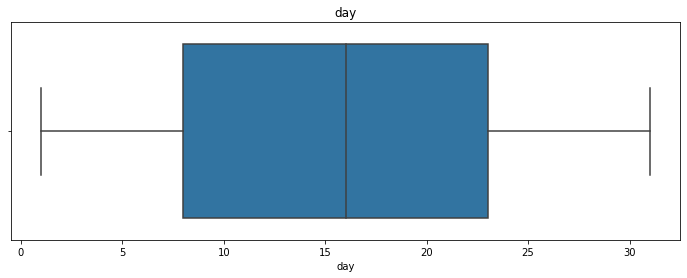

month        -0.005207238596535208


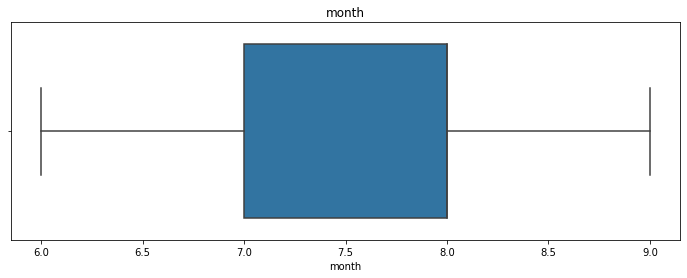

Temperature        -0.19132732849056694


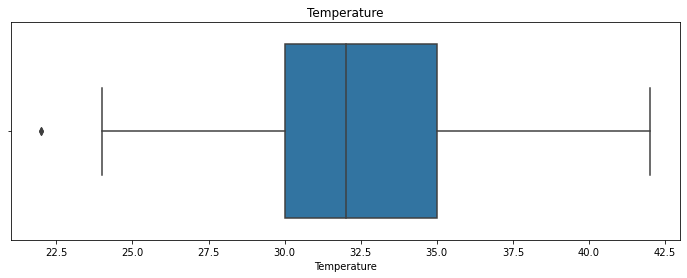

RH        -0.24279045559117962


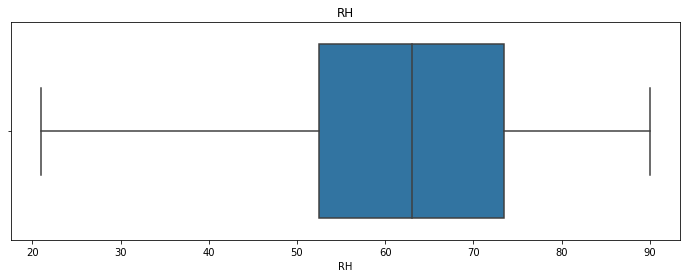

Ws        0.5555858444767362


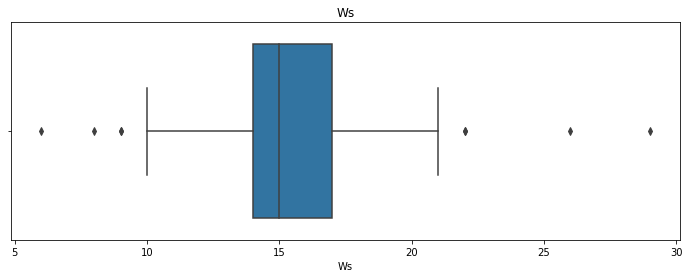

Rain        4.5686298057295645


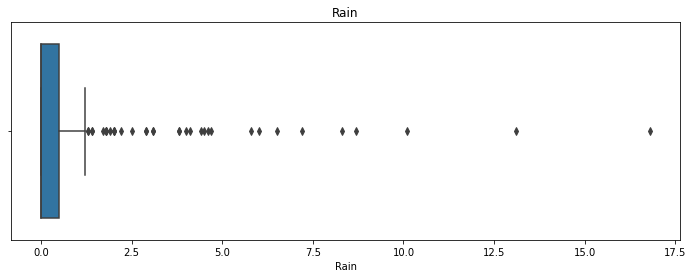

FFMC        -1.320130116085296


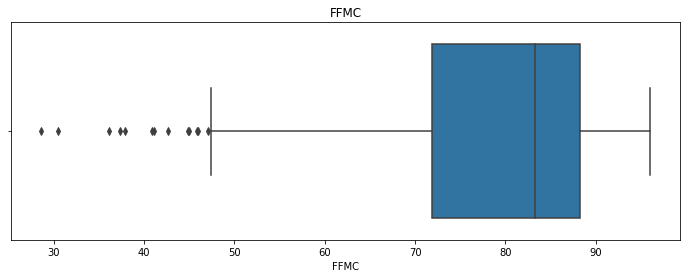

DMC        1.5229829314616827


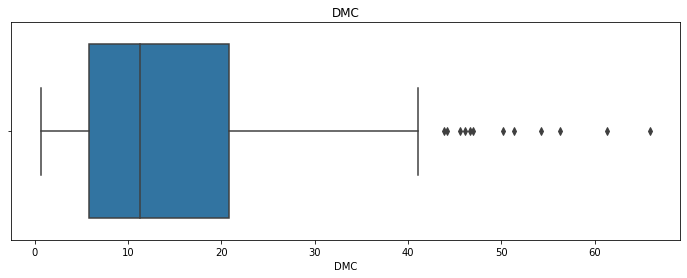

DC        1.4734602291852026


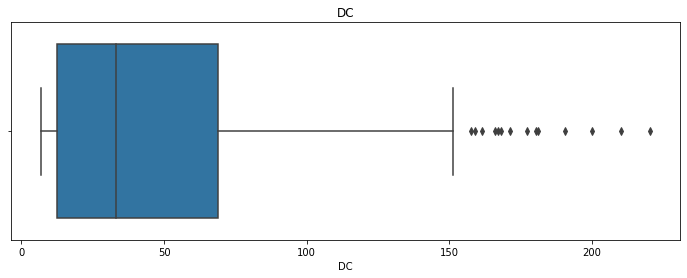

ISI        1.1402425645672238


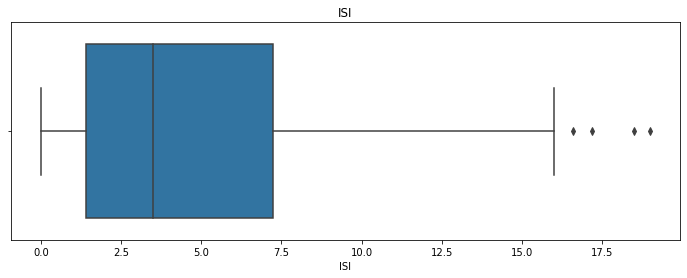

BUI        1.4527448411320751


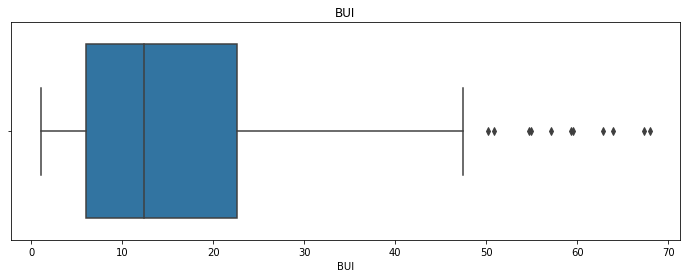

FWI        1.1475925108646539


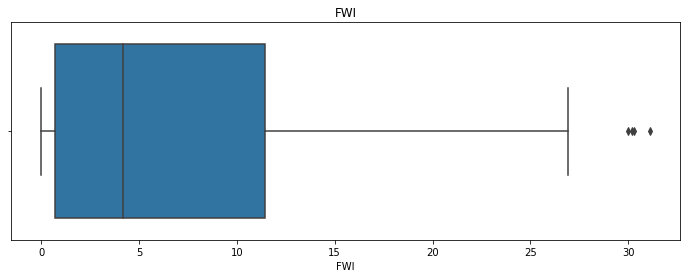

In [5]:
for col in df.columns:
    if col == 'year' or col == 'Classes':
        pass
    else:
        plt.figure(figsize=(12,4))
        print(f"{col}        {df[col].skew()}")
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

In [6]:
# FINDIND THE IQR
q1, q3 = df.Rain.quantile([.25,.75])
q1,q3

(0.0, 0.5)

In [7]:
iqr = q3 - q1
print(f"IQR : {iqr}")
upper_limit = q3 + 1.5 * (iqr)
lower_limit = q1 - 1.5 * (iqr)
print(f"LOWER LIMIT : {lower_limit}")
print(f"UPPER LIMIT : {upper_limit}")

IQR : 0.5
LOWER LIMIT : -0.75
UPPER LIMIT : 1.25


In [8]:
df1 = df.copy()

In [9]:
# BOXPLOAT
def plot_boxplot(df1,col):
    plt.figure(figsize=(12,4))
    print(f"{col}        {df1[col].skew()}")
    sns.boxplot(x=df1[col])
    plt.title(col)
    plt.show()

In [10]:
def detect_outlier_IQR(df1):
    # finding IQR
    
    
    for col in df1.columns:
        if col == "Classes" or col == "year":
            pass
        else:
            print("column : ",col)
            q1, q3 = df1[col].quantile([.25,.75])
            iqr = q3 - q1
            upper_limit = q3 + 1.5 * (iqr)
            lower_limit = q1 - 1.5 * (iqr)
            # df1 = np.where(df1[col] > upper_limit, upper_limit,df1[col])
            # df1 = np.where(df1[col] < lower_limit, lower_limit,df1[col])
            

            df1[col] = np.where(df1[col] > upper_limit, upper_limit, 
                                np.where(df1[col] < lower_limit, lower_limit,
                                df1[col]))
    # plot_boxplot(df1,col)
    return df1
    # return df1[df1[col]<lower_limit]
    # return df[(df[col] > upper_bound) | (df[col] < lower_bound)]


    

In [11]:
# for col in df1.columns:
#     if col == "Classes" or col == "year":
#         pass
#     else:
#         dataframe = detect_outlier_IQR(col)
#         display(dataframe)
detect_outlier_IQR(df1)

column :  day
column :  month
column :  Temperature
column :  RH
column :  Ws
column :  Rain
column :  FFMC
column :  DMC
column :  DC
column :  ISI
column :  BUI
column :  FWI


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012,29.0,57.0,18.0,0.00,65.700,3.4,7.6,1.3,3.4,0.5,not fire
1,2.0,6.0,2012,29.0,61.0,13.0,1.25,64.400,4.1,7.6,1.0,3.9,0.4,not fire
2,3.0,6.0,2012,26.0,82.0,21.5,1.25,47.175,2.5,7.1,0.3,2.7,0.1,not fire
3,4.0,6.0,2012,25.0,89.0,13.0,1.25,47.175,1.3,6.9,0.0,1.7,0.0,not fire
4,5.0,6.0,2012,27.0,77.0,16.0,0.00,64.800,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9.0,2012,30.0,65.0,14.0,0.00,85.400,16.0,44.5,4.5,16.9,6.5,fire
239,27.0,9.0,2012,28.0,87.0,15.0,1.25,47.175,6.5,8.0,0.1,6.2,0.0,not fire
240,28.0,9.0,2012,27.0,87.0,21.5,0.50,47.175,3.5,7.9,0.4,3.4,0.2,not fire
241,29.0,9.0,2012,24.0,54.0,18.0,0.10,79.700,4.3,15.2,1.7,5.1,0.7,not fire


c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

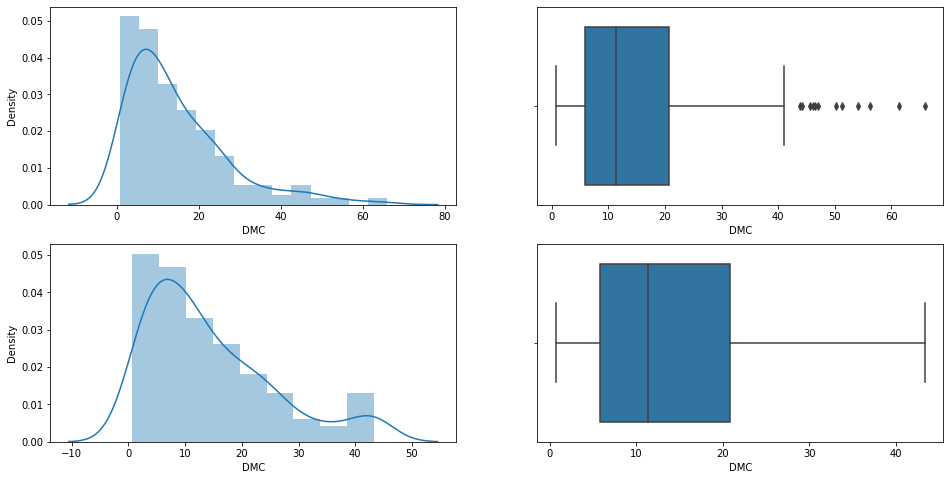

In [12]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['DMC'])

plt.subplot(2,2,2)
sns.boxplot(df['DMC'])

plt.subplot(2,2,3)
sns.distplot(df1['DMC'])

plt.subplot(2,2,4)
sns.boxplot(df1['DMC'])

plt.show()



In [13]:
df1.skew()

c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.170656
RH            -0.242790
Ws             0.186602
Rain           1.241294
FFMC          -1.082654
DMC            1.091065
DC             1.184410
ISI            1.031482
BUI            1.024216
FWI            1.058205
dtype: float64

In [14]:
df.skew()

c:\Users\VED\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

In [15]:
df1.to_csv("Outlier_removed.csv",index=False)